# Libary declaration

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import keras
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset load and class indentify

In [ ]:
directory=r'/content/drive/MyDrive/Tomatoo'#read main dataset
category=['Bacterial spot','Early blight','Healthy','Late blight','Leaf Mold','Mosaic virus','Septoria leaf spot','Spider mites','Target Spot','Yellow Leaf Curl Virus'] # classes of dataset 1 step

# labeling dataset

In [ ]:
img_size=224 # step 2
#no_of_image_to_show = 100
dataset=[]
for ctg in category: # ready for dataset training and Testing 
    folder=os.path.join(directory, ctg)
    classes=category.index(ctg)
    for img in os.listdir(folder):
        try:
            img_array=cv2.imread(os.path.join(folder,img))
            new_array=cv2.resize(img_array, (img_size,img_size))
            dataset.append([new_array,classes])
        except Exception as e:
            pass

In [ ]:
random.shuffle(dataset)

In [ ]:
X=[] # step 4
Y=[]
for features,label in dataset:
    X.append(features)
    Y.append(label)

# Converting into array

In [ ]:
X=np.array(X) # step 5
Y=np.array(Y)

In [ ]:
# datagen1 = ImageDataGenerator(
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       vertical_flip=True,
#       fill_mode='nearest',
#       validation_split = 0.2
# )

# Separting dataset for traning and testing

In [ ]:
from sklearn.model_selection import train_test_split # step 6
x_train,x_test,y_train,y_test=train_test_split(X,to_categorical(Y),test_size=0.25,random_state =15)#test_size=0.2#shuffle=True

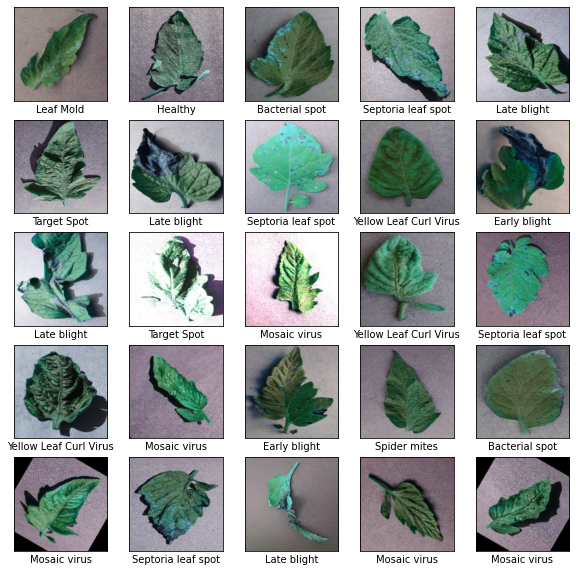

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i],cmap=plt.cm.binary)
    plt.xlabel(category[Y[i]])
plt.show()

In [ ]:
# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
print('Train', x_train.shape, y_train.shape)
print('Validation', x_test.shape, y_test.shape)

Train (1506, 224, 224, 3) (1506, 10)
Validation (502, 224, 224, 3) (502, 10)


In [ ]:
# x_train = x_train/255.0 # step 7
# x_test= x_test/255.0

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
)
datagen.fit(x_train)
x_batches = x_train
y_batches = y_train
# train_generator= datagen.flow(x_train, y_train, batch_size=32,subset='training')#save_to_dir='/content/drive/MyDrive/Tomato_Aug_train',save_format='png'
# valid_generator = datagen.flow(x_train, y_train, batch_size=10, subset='validation')

In [ ]:
epochs = 3

for e in range(epochs):
	print('Epoch', e)
	batches = 0
	per_batch = 5
	for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=per_batch):
		x_batches = np.concatenate((x_batches, x_batch), axis = 0)
		y_batches = np.concatenate((y_batches, y_batch), axis = 0)
		batches += 1
		if batches >= len(x_train) / per_batch:
			# we need to break the loop by hand because
			# the generator loops indefinitely
			break

Epoch 0
Epoch 1
Epoch 2


In [ ]:
print('New Training size', x_batches.shape, y_batches.shape)
#print('Validation', x_test.shape, y_test.shape)

New Training size (6024, 224, 224, 3) (6024, 10)


In [ ]:
x_batches = x_batches/255.0 # step 7
x_test= x_test/255.0

In [ ]:
x_batches=np.array(x_batches)
y_batches=np.array(y_batches)

In [ ]:
print('New Training size', x_batches.shape, y_batches.shape)

New Training size (6024, 224, 224, 3) (6024, 10)


# CNN Model

In [ ]:
model = models.Sequential() # model 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.8))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_batches,y_batches, epochs=80,validation_data=(x_test, y_test))#, validation_data=(x_test, y_test),datagen.flow(x_train,y_train,batch_size=10)

Epoch 1/80
189/189 [==============================] - 27s 70ms/step - loss: 2.0899 - accuracy: 0.1813 - val_loss: 1.9941 - val_accuracy: 0.2869
Epoch 2/80
189/189 [==============================] - 11s 56ms/step - loss: 1.7735 - accuracy: 0.3328 - val_loss: 1.5804 - val_accuracy: 0.4283
Epoch 3/80
189/189 [==============================] - 11s 56ms/step - loss: 1.4950 - accuracy: 0.4356 - val_loss: 1.1968 - val_accuracy: 0.5578
Epoch 4/80
189/189 [==============================] - 11s 56ms/step - loss: 1.2695 - accuracy: 0.5247 - val_loss: 1.1790 - val_accuracy: 0.5837
Epoch 5/80
189/189 [==============================] - 11s 57ms/step - loss: 1.1268 - accuracy: 0.5810 - val_loss: 1.1745 - val_accuracy: 0.5797
Epoch 6/80
189/189 [==============================] - 11s 58ms/step - loss: 1.0362 - accuracy: 0.6208 - val_loss: 0.7230 - val_accuracy: 0.7430
Epoch 7/80
189/189 [==============================] - 11s 57ms/step - loss: 0.8765 - accuracy: 0.6811 - val_loss: 1.0439 - val_accuracy:

# Evaluation and Accuracy report with confusion matrix

In [ ]:
y_test=np.argmax(y_test, axis=1)
y_test[1]

1

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
y_pred=model.predict(x_test)
y_pred_class=[np.argmax(element) for element in y_pred]
cm=confusion_matrix(y_test,y_pred_class)
print("confusion matrix: \n",cm)
print("Classification Report: \n",classification_report(y_test,y_pred_class))

confusion matrix: 
 [[49  1  1  0  0  0  0  0  1  1]
 [ 0 46  0  1  1  1  1  0  1  0]
 [ 0  0 47  0  0  0  0  0  1  0]
 [ 0  2  0 46  0  0  0  0  0  1]
 [ 0  1  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  0]
 [ 0  0  0  1  3  1 41  0  0  0]
 [ 0  0  6  0  0  0  0 46  1  0]
 [ 0  0  0  0  0  2  0  1 51  0]
 [ 1  1  0  0  0  1  0  2  1 53]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.90      0.90      0.90        51
           2       0.87      0.98      0.92        48
           3       0.96      0.94      0.95        49
           4       0.91      0.97      0.94        40
           5       0.91      1.00      0.95        49
           6       0.98      0.89      0.93        46
           7       0.94      0.87      0.90        53
           8       0.91      0.94      0.93        54
           9       0.96      0.90      0.93        59

    accuracy                

# Confusion matrix Graph

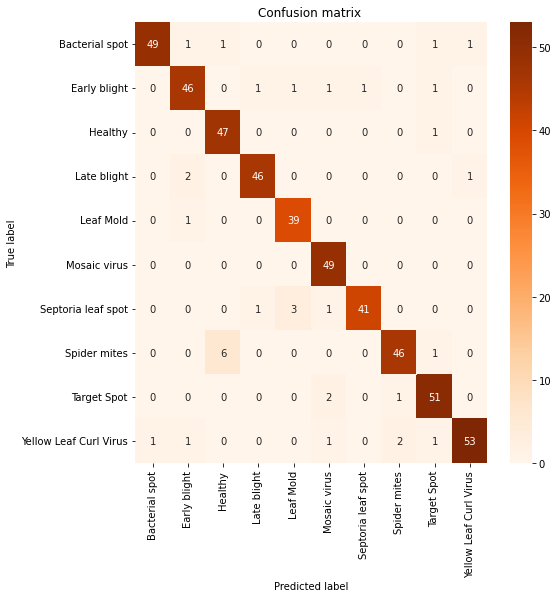

In [ ]:
cm = pd.DataFrame(cm,index = category, 
                     columns = category)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,cmap=plt.cm.Oranges)
plt.tight_layout()
plt.title('Confusion matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig("D:\Vehicle\img222.png")
plt.show()

# Traning and Validation loss graph

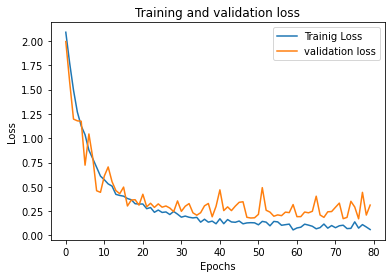

In [ ]:
#model.evaluate(x_test,y_test,batch_size=32, verbose=1)
plt.plot(history.history['loss'],label='Trainig Loss')
plt.plot(history.history['val_loss'],label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#plt.savefig("D:\Vehicle\img1.png")
plt.show()

In [ ]:
x_test.shape

(502, 224, 224, 3)

In [ ]:
x_train.shape

(1506, 224, 224, 3)

# Traning and Validation Accuracy graph

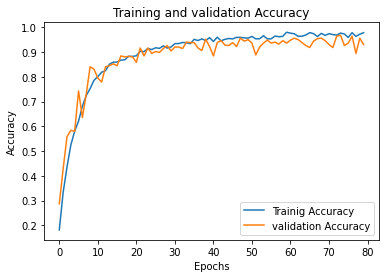

In [ ]:
#model.evaluate(x_test,y_test,batch_size=32, verbose=1)
plt.plot(history.history['accuracy'],label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'],label="validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#plt.savefig("D:\Vehicle\img2.png")
plt.show()

# Actual and Prediction Graph

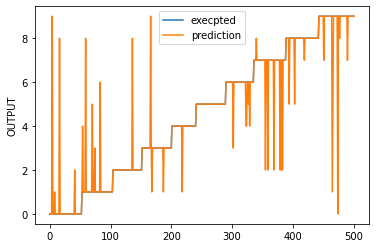

In [ ]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.savefig("cnn.png")
    plt.show()
y_test1 = np.array(list(y_test))
y_pred1 = np.array(y_pred_class)
chart_regression(y_pred1.flatten(),y_test1)